In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
import seaborn as sns
from shapely.geometry import Polygon

In [50]:
# Read the file, assuming it's tab-separated and the first row contains column names
file_path = '../output/output2_ym.csv'   
df = pd.read_csv(file_path, sep='\t')

In [51]:
#Splits the 'eeacellcode' column into three new columns ('resolution', 'long', 'lat')
#    with four characters in each and adds them to the DataFrame.
#
#    Parameters:
#    - df: The original DataFrame containing the 'eeacellcode' column.
#
#    Returns:
#    - df: The modified DataFrame with the new columns added.
#    """
# Check if 'eeacellcode' column exists in the DataFrame
if 'eeacellcode' in df.columns:
     # Splitting the 'eeacellcode' column into three new columns
     df['resolution'] = df['eeacellcode'].str[:4]
     df['long'] = df['eeacellcode'].str[4:8]
     df['lat'] = df['eeacellcode'].str[8:12]
else:
     print("The column 'eeacellcode' does not exist in the DataFrame.")

In [52]:
df = df.dropna()

In [53]:
# Remove the first character from 'long' and 'lat' columns and create new 'longitude' and 'latitude' columns
df['longitude'] = df['long'].str[1:]

In [54]:
df['latitude'] = df['lat'].str[1:]

In [55]:
df['longitude'] = pd.to_numeric(df['longitude'], downcast='float') * 10000
df['latitude'] = pd.to_numeric(df['latitude'], downcast='float') * 10000

In [56]:
# Print the first few rows of the DataFrame to verify the new columns
print(df.head(10))

  yearmonth   eeacellcode      basisofrecord  \
0   2024-03  10kmE264N197  HUMAN_OBSERVATION   
1   2024-03  10kmE269N175  HUMAN_OBSERVATION   
2   2024-03  10kmE274N213  HUMAN_OBSERVATION   
3   2024-03  10kmE279N236  HUMAN_OBSERVATION   
4   2024-03  10kmE285N166  HUMAN_OBSERVATION   
5   2024-03  10kmE287N160  HUMAN_OBSERVATION   
6   2024-03  10kmE299N161  HUMAN_OBSERVATION   
7   2024-03  10kmE326N164  HUMAN_OBSERVATION   
8   2024-03  10kmE352N199  HUMAN_OBSERVATION   
9   2024-03  10kmE357N205  HUMAN_OBSERVATION   

                             datasetkey countrycode  occurrences  \
0  50c9509d-22c7-4a22-a47d-8c48425ef4a7          PT            1   
1  50c9509d-22c7-4a22-a47d-8c48425ef4a7          PT            7   
2  50c9509d-22c7-4a22-a47d-8c48425ef4a7          PT            1   
3  50c9509d-22c7-4a22-a47d-8c48425ef4a7          ES            1   
4  50c9509d-22c7-4a22-a47d-8c48425ef4a7          ES            1   
5  50c9509d-22c7-4a22-a47d-8c48425ef4a7          ES            

In [57]:
# Convert 'longitude' and 'latitude' to numeric types, if they're not already
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

# V

# Create a new GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Set the coordinate reference system (CRS) to ETRS89-LAEA Europe (EPSG:3035) for latitude and longitude
gdf.crs = "EPSG:3035"

# Now 'gdf' is a GeoDataFrame with a 'geometry' column holding spatial data

# Example: Save this GeoDataFrame to a shapefile
# gdf.to_file("species_locations.shp")

print(gdf.head())


  yearmonth   eeacellcode      basisofrecord  \
0   2024-03  10kmE264N197  HUMAN_OBSERVATION   
1   2024-03  10kmE269N175  HUMAN_OBSERVATION   
2   2024-03  10kmE274N213  HUMAN_OBSERVATION   
3   2024-03  10kmE279N236  HUMAN_OBSERVATION   
4   2024-03  10kmE285N166  HUMAN_OBSERVATION   

                             datasetkey countrycode  occurrences  \
0  50c9509d-22c7-4a22-a47d-8c48425ef4a7          PT            1   
1  50c9509d-22c7-4a22-a47d-8c48425ef4a7          PT            7   
2  50c9509d-22c7-4a22-a47d-8c48425ef4a7          PT            1   
3  50c9509d-22c7-4a22-a47d-8c48425ef4a7          ES            1   
4  50c9509d-22c7-4a22-a47d-8c48425ef4a7          ES            1   

   isCitizenScience  year  month resolution  long   lat  longitude   latitude  \
0                 1  2024      3       10km  E264  N197  2640000.0  1970000.0   
1                 1  2024      3       10km  E269  N175  2690000.0  1750000.0   
2                 1  2024      3       10km  E274  N213  27

In [123]:
list =['RO', 'HR', 'CY', 'DK', 'GB', 'FR', 'DE', 'GR', 'IS', 'EE', 'IL', 
       'IT', 'MA', 'NL', 'NO', 'PT', 'ES', 'SE', 'TN', 'TR']

filtered = gdf[((gdf['year'] == 2005)) & gdf['countrycode'].isin(list) ]

print((filtered['countrycode']).unique())

['FR' 'NL' 'DK' 'SE' 'GB' 'NO' 'GR' 'ES' 'HR' 'EE' 'PT' 'IT' 'DE']


<ipython-input-131-d30d7f398ea2>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


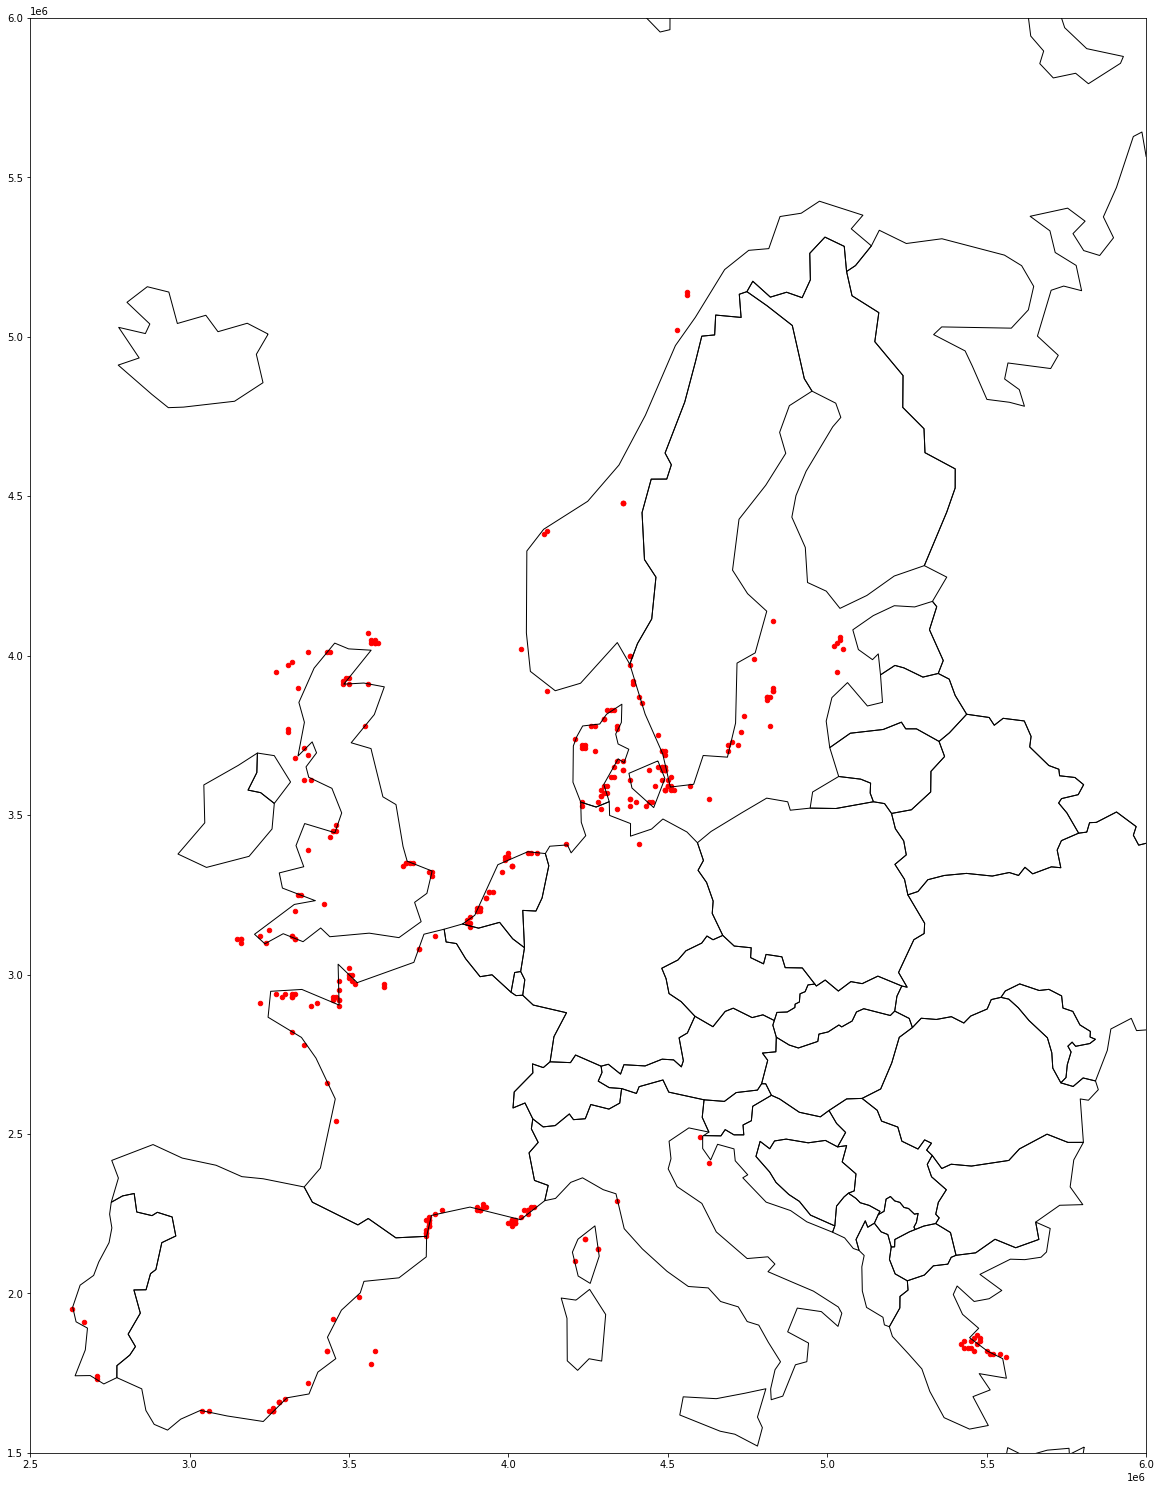

In [131]:
min_longitude, max_longitude = 2500000, 6000000  # Adjust these values to your desired longitude bounds
min_latitude, max_latitude = 1500000, 6000000 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
europe = europe.to_crs(filtered_gdf.crs)




fig, ax = plt.subplots(figsize=(20, 32))


ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

# Basic plot
europe.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
filtered.plot(ax=ax, marker='o', color='red', markersize=20, figsize=(20, 32))
plt.show()


In [59]:
# Step 1: Calculate the start year of the decade for each row and create a new 'decade' column
gdf['decade'] = (gdf['year'] // 10) * 10

In [69]:
gdf['geometry_wkt'] = gdf['geometry'].apply(lambda x: x.wkt)

print(gdf.crs)

EPSG:3035


In [96]:
# Grouping the DataFrame by 'eeacellcode' and 'isCitizenScience'

grouped_df = gdf.groupby(['decade', 'eeacellcode', 'long', 'lat', 'longitude', 'latitude', 'geometry_wkt'])[['occurrences', 'basisofrecord']].sum().reset_index()

grouped_df.crs = gdf.crs

In [97]:
print(grouped_df.head(1))
#print(grouped_df.describe())

   decade   eeacellcode  long   lat  longitude   latitude  \
0    1500  10kmE394N225  E394  N225  3940000.0  2250000.0   

              geometry_wkt  occurrences      basisofrecord  
0  POINT (3940000 2250000)            1  HUMAN_OBSERVATION  


In [98]:
print(grouped_df.crs)

EPSG:3035


In [99]:
print(grouped_df.columns)

Index(['decade', 'eeacellcode', 'long', 'lat', 'longitude', 'latitude',
       'geometry_wkt', 'occurrences', 'basisofrecord'],
      dtype='object')


In [100]:
grouped_df['geometry'] = grouped_df['geometry_wkt'].apply(wkt.loads)

<ipython-input-110-593b0b7860d8>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


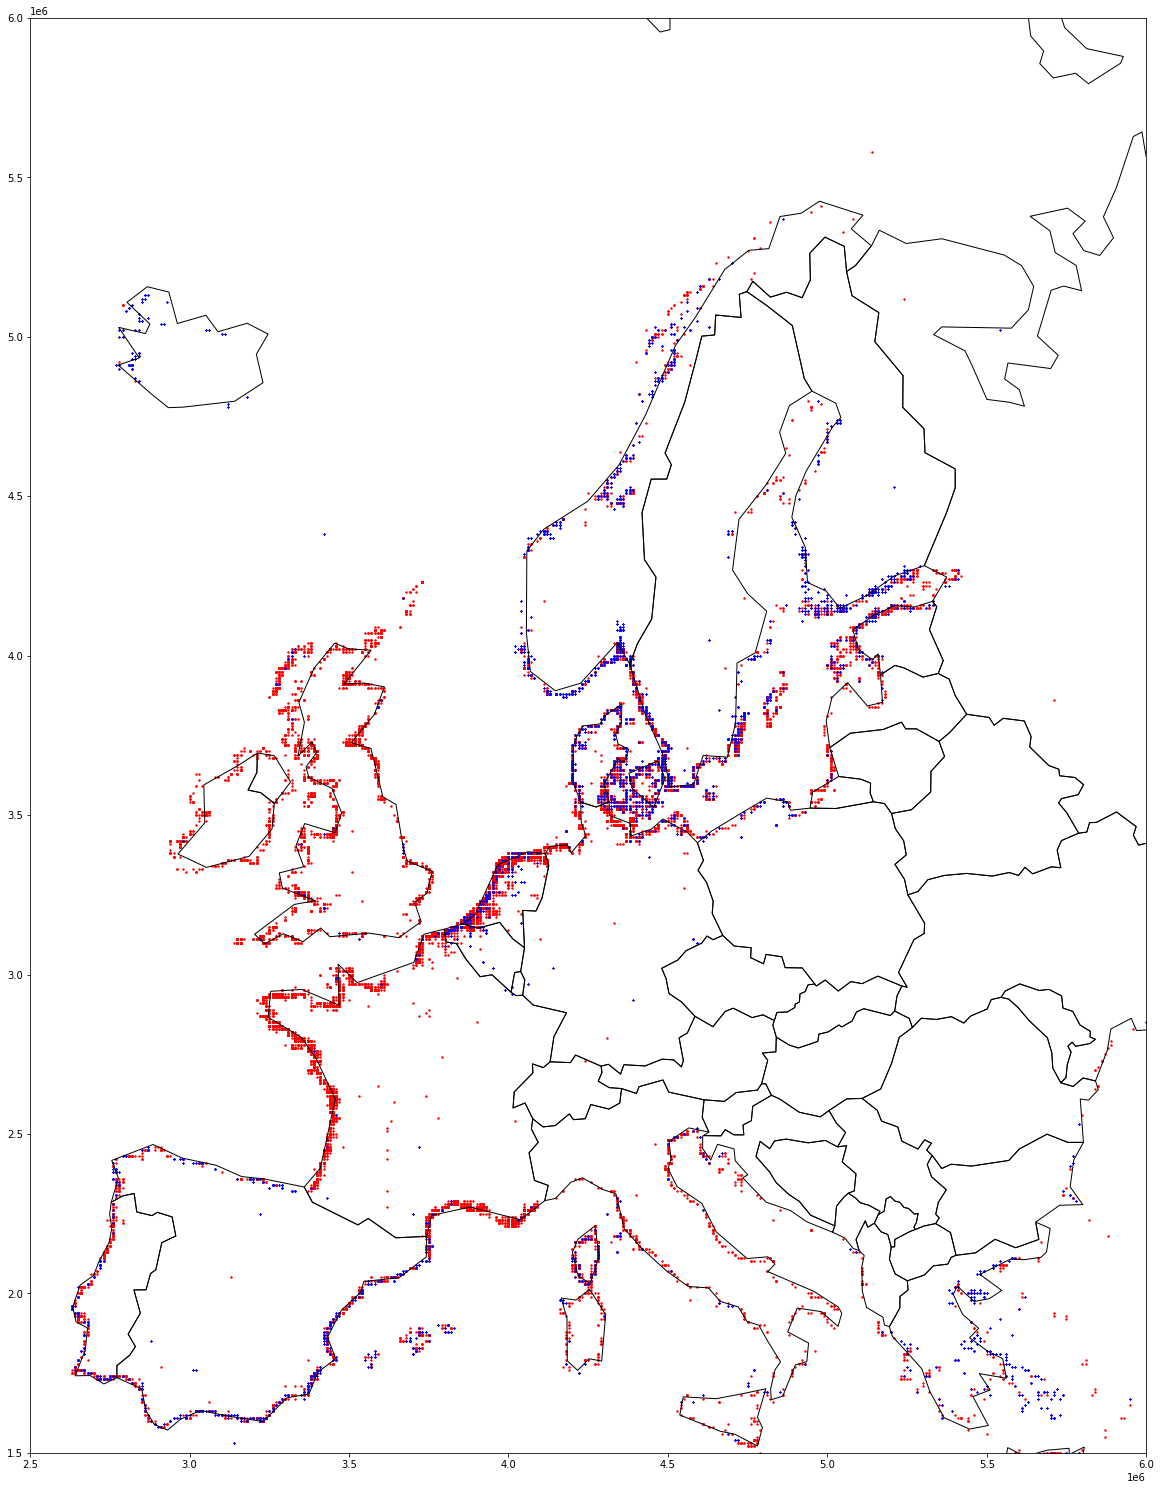

In [110]:
# Basic plot of Aythya fuligula (L., 1758) = 2498261
# Basic plot of Anas platyrhynchos Linnaeus, 1758 = 9761484

min_longitude, max_longitude = 2500000, 6000000  # Adjust these values to your desired longitude bounds
min_latitude, max_latitude = 1500000, 6000000 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
europe = europe.to_crs(filtered_gdf.crs)


fig, ax = plt.subplots(figsize=(20, 32))

ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

# Select rows where the 'specieskey' column matches the specific_specieskey
filtered_gdf = gdf[gdf['basisofrecord'] == 'PRESERVED_SPECIMEN']
filtered_gdf2 = gdf[gdf['basisofrecord'] != 'PRESERVED_SPECIMEN']


filtered_gdf2.plot(ax=ax, marker='o', color='red', markersize=2)
filtered_gdf.plot(ax=ax, marker='x', color='blue', markersize=2)
europe.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
plt.show()